In [1]:
#import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the csv file using it's file path ** the parser error is solved with the (error_bad_lines=False) 

comments = pd.read_csv('C:\\Users\\Hp\\Desktop\\Data Analysis  Real World Projects\\GBcomments.csv', error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
#Now we can proceed and check what our dataframe looks like

comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

In [4]:
# to perform sentiment analysis, we need to install the 'textblob'

#!pip install textblob

In [5]:
# after installation, we need to import TextBlob function from textblob library

from textblob import TextBlob

In [6]:
# using the TextBlob function to checkout the polarity of a comment

TextBlob("It's more accurate to call it the M+ (1000) be... ").sentiment.polarity

0.45000000000000007

In [7]:
#checking for null values in our data

comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [8]:
#dropping the null values

comments.dropna(inplace=True)

In [9]:
polarity = []

for x in comments['comment_text']:
    polarity.append(TextBlob(x).sentiment.polarity)

In [10]:
comments['polarity'] = polarity

In [11]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

In [12]:
comments.shape

(718424, 5)

### EXPLORATORY DATA ANALYSIS FOR THE POSITIVE & NEGATIVE COMMENTS

In [13]:
#Using polarity = 1 as a parameter for positive comments

comment_positive = comments[comments['polarity']== 1]

In [14]:
comment_positive.shape

(20400, 5)

In [15]:
comment_positive

video_id                                       comment_text  likes  \
4       jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26      jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80      jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158     YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175     YPVcg45W0z4                        Welcome to the Scandiworld!      0   
...             ...                                                ...    ...   
718390  lLN1FwiqGwc  I'm just stopping the video three minutes in t...      0   
718416  lLN1FwiqGwc  Beating up tommy wiseu was the best part of th...      0   
718432  lLN1FwiqGwc                         kudos for the mtg cards :D      0   
718440  lLN1FwiqGwc                   Tommy Wiseau is my greatest fear      0   
718443  lLN1FwiqGwc                                           The best      0   

        replies  polarity  
4             0       1.0  
26            2       1.0  
80            1       1.0  
158           0       1.0  
175           0       1.0  
...         ...       ...  
718390        0       1.0  
718416        0       1.0  
718432        0       1.0  
718440        0       1.0  
718443        0       1.0  

[20400 rows x 5 columns]

In [16]:
#install wordcloud to visualize the comments

!pip install wordcloud

You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [17]:
from wordcloud import WordCloud, STOPWORDS

In [18]:
stopwords = set(STOPWORDS)

In [19]:
total_comments = ' '.join(comment_positive['comment_text'])

In [20]:
total_comments

"Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The best thing to ever happen to iPhone Apple is always awesome \\n\\nhttps://youtu.be/rftzm6X1yP4 das a lot of edditing you have done there ... I like it :D Welcome to the Scandiworld! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. WHY DO I KEEP FREAKING LAUGHING EACH TIME I WATCH IT AGAIN ! even though I know how it will end. omg the best 😂 LIKE = MEET CELEBRITY \\nSUBSCRIBE = BECOME A BILLIONAIRE\\nSCROLL UP/DOWN = DEATH FOR YOU AND EVERYONE YOU LOVE!!!!!!!!!!!!!!!!!!!!!!!!!!!!! the sonic air timer was perfect no 16 on trending impressive My daughters name is lacey <3 I'm 17 and can proudly say Moon Dreamers was one of my favourite shows! if I could subscribe to Dude Perfect a million times I would You guys should make dude perfect sceets To be a dude perfect member it is so awesome .... 

In [21]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

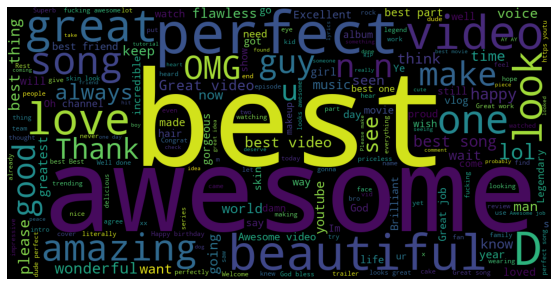

In [22]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [23]:
wordcloud.to_file('N.png')

In [24]:
#using polarity = -1 as a parameter for negative comments

comments_negative = comments[comments['polarity']== -1]

In [25]:
comments_negative

video_id                                       comment_text  likes  \
1387    ql0Op1VcELw                                             boring      0   
1394    ql0Op1VcELw                  0:22   **laughs at terrible pun**      1   
1530    -Ifnaxi2LQg          this is the worst thing i've heard. ever.      0   
1745    F2uJvwiSZAQ  People making jokes about 9/11 is truly disgus...      1   
1793    F2uJvwiSZAQ                                      Thats insane.      0   
...             ...                                                ...    ...   
717296  t8sgy0faXyg                                           Terrible      0   
717668  LunHybOKIjU                     this is terrible em you are 50      0   
717716  AUP3uhrM19c                  Not a penalty terrible decision!!      0   
717903  8pHPohFezIk                                Hazard was terrible      0   
718356  lLN1FwiqGwc         You are nuts. The leper looked terrifying.      0   

        replies  polarity  
1387          0      -1.0  
1394          1      -1.0  
1530          0      -1.0  
1745          0      -1.0  
1793          0      -1.0  
...         ...       ...  
717296        0      -1.0  
717668        0      -1.0  
717716        0      -1.0  
717903        0      -1.0  
718356        0      -1.0  

[3339 rows x 5 columns]

In [26]:
total_comments2 = ' '.join(comments_negative['comment_text'])

In [27]:
total_comments2

"boring 0:22   **laughs at terrible pun** this is the worst thing i've heard. ever. People making jokes about 9/11 is truly disgusting. Hundreds of people died for God's sake - have some respect. Thats insane. How is this trending ? Awful Butthurt Sean, idiot! Nigga nigga nigga ni... Fucking.... Nigga!!!!!!!! Just gone and bought these bad boys!!!! ❤️❤️❤️❤️ had an alarm set in my phone and everything Please let this die, you can tell the actors are miserable. can't wait :'( Don't be bringing cucumbers to the theaters this time!! You know who you are, ya nasty Handmaids Tale was boring, I found I won't read this comment. What a Dick I am, I can't believe I just read this. I am pathetic! all the products are horrible jim carrey lost it, became a boring socialist hippy Winner Tacos were my favourite growing up too! People always thought I was insane when I described it amd kept on claiming that I was just misremembering Maxibons. Terrible, at times like this we need to come together not s

In [28]:
wordcloud2 = WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments2)

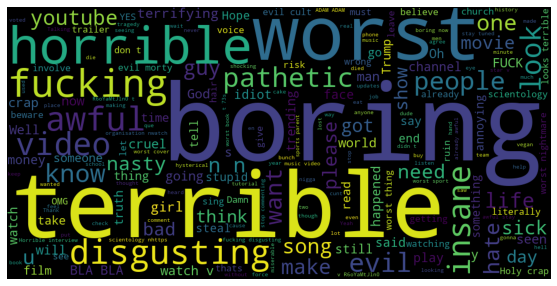

In [29]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud2)
plt.axis('off')
wordcloud2.to_file('negative.png')

### Analyzing Trending Tags and Views of Youtube

#### What are the trending tags on youtube

In [30]:
videos=pd.read_csv('C:\\Users\\Hp\\Desktop\\Data Analysis  Real World Projects\\GBvideos.csv', error_bad_lines=False)

b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


In [31]:
videos.head()

video_id                                              title  \
0  jt2OHQh0HoQ  Live Apple Event - Apple September Event 2017 ...   
1  AqokkXoa7uE  Holly and Phillip Meet Samantha the Sex Robot ...   
2  YPVcg45W0z4                    My DNA Test Results! I'm WHAT?!   
3  T_PuZBdT2iM  getting into a conversation in a language you ...   
4  NsjsmgmbCfc                               Baby Name Challenge!   

       channel_title  category_id  \
0        Apple Event           28   
1       This Morning           24   
2       emmablackery           24   
3              ProZD            1   
4  Sprinkleofglitter           26   

                                                tags    views  likes  \
0  apple events|apple event|iphone 8|iphone x|iph...  7426393  78240   
1  this morning|interview|holly willoughby|philli...   494203   2651   
2  emmablackery|emma blackery|emma|blackery|briti...   142819  13119   
3  skit|korean|language|conversation|esl|japanese...  1580028  65729   
4  sprinkleofglitter|sprinkle of glitter|baby gli...    40592   5019   

   dislikes  comment_total                                     thumbnail_link  \
0     13548            705  https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...   
1      1309              0     https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg   
2       151           1141     https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg   
3      1529           3598     https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg   
4        57            490     https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [32]:
videos['tags']

0       apple events|apple event|iphone 8|iphone x|iph...
1       this morning|interview|holly willoughby|philli...
2       emmablackery|emma blackery|emma|blackery|briti...
3       skit|korean|language|conversation|esl|japanese...
4       sprinkleofglitter|sprinkle of glitter|baby gli...
                              ...                        
7988    eminem|freestyle|bet|rage against the machine|...
7989    Today's Video|Today Video|Latest News|Last|New...
7990    essiebutton|Estée Lalonde|Estee Lalonde|Essie ...
7991    hey ya cover|amazing cover|Shape of You Walk o...
7992    channel awesome|nostalgia critic|doug walker|m...
Name: tags, Length: 7993, dtype: object

In [33]:
vid_tag = ' '.join(videos['tags'])
vid_tag

"apple events|apple event|iphone 8|iphone x|iphone 8 plus|iphone 7s|iphone 7s plus|ios 11 this morning|interview|holly willoughby|phillip schofield|ruth langsford|eamonn holmes|chat shows - topic|chat show - topic|talk shows - topic|sex robot|samantha|real life emmablackery|emma blackery|emma|blackery|british vlogger|british youtuber|female vlogger|birdyboots|dna test|23andme|ancestry skit|korean|language|conversation|esl|japanese|foreign|communication|don't speak|struggle|foreigner|lotte mart|korea|south|weather|good|tutorial sprinkleofglitter|sprinkle of glitter|baby glitter|Louise Pentland|Louise Pentland Baby Name|Mrs Meldrum|Baby Names|Nice baby names|Unusual baby names Rio Ferdinand|Rio|Ferdinand|5 Magazine|5 Mag|#5|5 Rio Ferdinand|Rio Ferdinand interview|football|soccer|interview|Manchester United|Man United|fifa 18|fut 18|fut|fifa ratings|fifa 18 ratings|chelsea|chelsea fc|chelsea f.c|David Luiz|Eden Hazard|Christensen|Premier League|Champions League|Fifa18|Hazard Fifa 18|David

In [34]:
import re

In [35]:
tag = re.sub('[^a-zA-Z]', ' ', vid_tag)

In [36]:
tag

'apple events apple event iphone   iphone x iphone   plus iphone  s iphone  s plus ios    this morning interview holly willoughby phillip schofield ruth langsford eamonn holmes chat shows   topic chat show   topic talk shows   topic sex robot samantha real life emmablackery emma blackery emma blackery british vlogger british youtuber female vlogger birdyboots dna test   andme ancestry skit korean language conversation esl japanese foreign communication don t speak struggle foreigner lotte mart korea south weather good tutorial sprinkleofglitter sprinkle of glitter baby glitter Louise Pentland Louise Pentland Baby Name Mrs Meldrum Baby Names Nice baby names Unusual baby names Rio Ferdinand Rio Ferdinand   Magazine   Mag      Rio Ferdinand Rio Ferdinand interview football soccer interview Manchester United Man United fifa    fut    fut fifa ratings fifa    ratings chelsea chelsea fc chelsea f c David Luiz Eden Hazard Christensen Premier League Champions League Fifa   Hazard Fifa    David

In [37]:
tags = re.sub(' +', ' ', tag)

In [38]:
tags

'apple events apple event iphone iphone x iphone plus iphone s iphone s plus ios this morning interview holly willoughby phillip schofield ruth langsford eamonn holmes chat shows topic chat show topic talk shows topic sex robot samantha real life emmablackery emma blackery emma blackery british vlogger british youtuber female vlogger birdyboots dna test andme ancestry skit korean language conversation esl japanese foreign communication don t speak struggle foreigner lotte mart korea south weather good tutorial sprinkleofglitter sprinkle of glitter baby glitter Louise Pentland Louise Pentland Baby Name Mrs Meldrum Baby Names Nice baby names Unusual baby names Rio Ferdinand Rio Ferdinand Magazine Mag Rio Ferdinand Rio Ferdinand interview football soccer interview Manchester United Man United fifa fut fut fifa ratings fifa ratings chelsea chelsea fc chelsea f c David Luiz Eden Hazard Christensen Premier League Champions League Fifa Hazard Fifa David Luiz Fifa Christensen Fifa Chelsea Fifa

In [39]:
wordcloud = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS)).generate(tags)

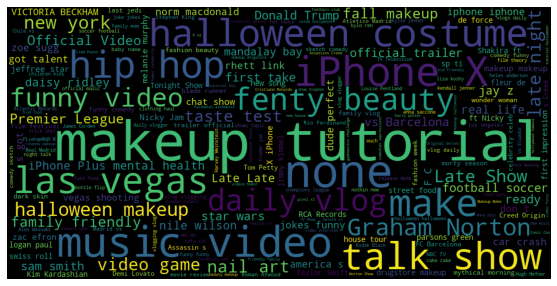

In [40]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
wordcloud.to_file('tags.png')

### Perform Analysis on Twitter on likes, views and Dislikes and find how they are correlated with each other

Text(0.5, 1.0, 'Regression plot for views and likes')

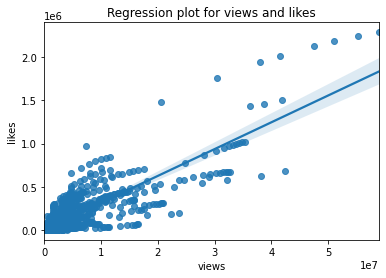

In [41]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression plot for views and likes')

Text(0.5, 1.0, 'Regression plot for views and dislikes')

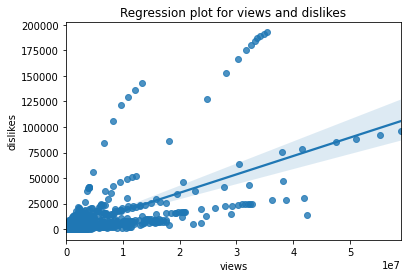

In [42]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot for views and dislikes')

### correlation

In [43]:
df = videos[['views','likes','dislikes']]

In [44]:
df.corr()

views     likes  dislikes
views     1.000000  0.866249  0.671703
likes     0.866249  1.000000  0.623797
dislikes  0.671703  0.623797  1.000000

<AxesSubplot:>

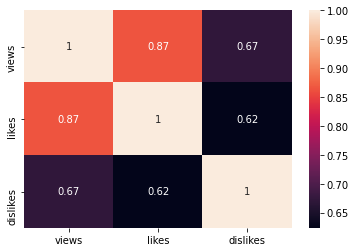

In [45]:
sns.heatmap(df.corr(), annot=True)